## Data loading - RLFW
Source: http://whdeng.cn/RFW/testing.html


Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [38]:
# Load packages




# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model


### Descriptive analysis of data

#### Data concatenation

In [39]:
# ## Create dataframe

# # Define the path to the raw data directory
# raw_data_path = '../data/raw_full/' #/raw/

# # Initialize lists to store image characteristics
# img_names = []
# ethnicities = []
# face_ids = []
# id_class = []
# img_name_org_list = []
# # Iterate through the directories of each ethnicity (e.g., 'Asian')
# ethnicities_list = os.listdir(raw_data_path + 'RFW_full/data') #RLFW_mini/data
# for ethnicity in ethnicities_list:
#     ethnicity_dir = os.path.join(raw_data_path + 'RFW_full/data', ethnicity)
#     if os.path.isdir(ethnicity_dir): # indside dir
#         id_list = os.listdir(ethnicity_dir) # get ids
#         for id_name in id_list:
#             id = id_name.split('.')[1]
#             ids_dir = os.path.join(ethnicity_dir, id_name)
#             if os.path.isdir(ids_dir):
#                 for img_name in os.listdir(ids_dir):
#                     if img_name.endswith('.jpg'):
#                         # Extract information from image filename
#                         img_name_org = '.'.join(img_name.split(".")[:-1])
#                         image_name = os.path.splitext(img_name)[0]
#                         image_info = image_name.split('_')
#                         image_id = image_info[-1]

#                         # Append image characteristics to lists
#                         img_name_org_list.append(img_name_org)
#                         img_names.append(id_name)
#                         ethnicities.append(ethnicity)



# # Create a DataFrame from the lists
# data = {'image_name': img_name_org_list,'identity_name': img_names, 'ethnicity': ethnicities}
# df = pd.DataFrame(data)

# # Display the DataFrame
# print(len(df))
# df.head()

In [40]:

# df[df.im_id == "m.0h1hdn_"]

In [41]:
# df[df.im_id == "m.07b_7v"] # obs im id skal laves om til folder navn - det er det her men ikke i age_Df...

In [42]:
# combine
mated_adults_image_info = pd.read_csv('../../data/image_info_csvs/mated_adults_image_info.csv')
nonmated_adults_image_info = pd.read_csv('../../data/image_info_csvs/nonmated_adults_image_info.csv')

df = pd.concat([mated_adults_image_info,nonmated_adults_image_info])


In [43]:
len(df)

40681

In [44]:
# Check duplicates
duplicates_df = df["image_name"].duplicated()
print("number of duplicated img_names: ", duplicates_df.sum(), "\nexpample: ")
# df[df.image_name == "m.02qzvw6_0002"]

number of duplicated img_names:  111 
expample: 


In [45]:
# Drop duplicates by last, that is how dicts are created later
df.drop_duplicates(subset=['image_name'], keep='last', inplace=True)

# Are duplciates removed?
print("length of dropped duplicates df: ", len(df), "more?: ", df["image_name"].duplicated().sum(), ", diff")
# den har fjernet et af hvert navn hvilket resulterer i 37.


length of dropped duplicates df:  40570 more?:  0 , diff


In [46]:
df[df.image_name == "m.02qzvw6_0002"]

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar
12469,Asian_m.02qzvw6/m.02qzvw6_0002.jpg,m.02qzvw6_0002,m.02qzvw6,enrolled,Asian,37.0,m.02qzvw6,43,70,98,99


In [47]:
# Check if any of the im_ids has "-"
len(df[df.identity_name.str.contains("_")])

5230

In [48]:
df.ethnicity.value_counts()

African      10378
Indian       10308
Caucasian    10196
Asian         9688
Name: ethnicity, dtype: int64

In [49]:
# Check if any of the names has double "__"
len(df[df.identity_name.str.contains("_")])

5230

In [50]:
len(df)

40570

In [51]:
df.head()

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar
0,African_m.010lz5/m.010lz5_0001.jpg,m.010lz5_0001,m.010lz5,enrolled,African,38.0,m.010lz5,35,100,100,100
1,African_m.010lz5/m.010lz5_0002.jpg,m.010lz5_0002,m.010lz5,enrolled,African,29.0,m.010lz5,40,76,81,97
2,African_m.010lz5/m.010lz5_0003.jpg,m.010lz5_0003,m.010lz5,enrolled,African,37.0,m.010lz5,34,99,76,100
3,African_m.011y5k/m.011y5k_0001.jpg,m.011y5k_0001,m.011y5k,enrolled,African,40.0,m.011y5k,5,90,100,100
4,African_m.011y5k/m.011y5k_0002.jpg,m.011y5k_0002,m.011y5k,enrolled,African,43.0,m.011y5k,51,100,100,100


In [52]:
# raw_data_path = '/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data/age_estimations/data sendt fra Gabi senest/'
# data_dict = {}

# for ethnicity_age in os.listdir(raw_data_path):
#     if ethnicity_age.endswith('.json'):
#         with open( raw_data_path + ethnicity_age, 'r') as file:
#             json_data = json.load(file)
#             data_dict.update(json_data)

#             #check for uniqueness
#             unique_keys = list(json_data.keys())
#             num_unique_keys = len(set(unique_keys))
#             #print("ids",num_unique_keys, 'len', len(unique_keys), "len dict", len(json_data))

# # Convert the JSON data to a DataFrame: if duplicates only the last occurence of the key is kept (python dict rules)
# age_df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Age'])
# print("df length: ",len(age_df)) #11416
# # Convert the 'Age' column to numeric
# age_df['Age'] = pd.to_numeric(age_df['Age'])
# age_df.reset_index(inplace=True)
# age_df.columns = ['image_name', 'Age']

# # convert from m.02q26w2_0001 to m.02q26w2
# age_df["identity_name"] = age_df.image_name.apply(lambda x: x[:-5])
# age_df.head()

In [53]:
# Null values, drop these:
# age_df[age_df.isnull().any(axis=1)]

In [54]:
# # Drop null values
# age_df = age_df.dropna()
# print("len of dropped df: ",len(age_df), 40570-159)

In [55]:
#print("RESULTING DF should be with n rows: ", len(age_df))

In [56]:
# Check if some values in df1['name'] are not equal to values in df2['name']
# not_equal_values = age_df['img_name'] != df['img_name']

# # Check if any value is not equal
# if not_equal_values.any():
#     print("Some values in df1['name'] are not equal to values in df2['name']")
# else:
#     print("All values in df1['name'] are equal to values in df2['name']")

In [57]:
# # Convert the 'name' columns to sets
# set1 = set(age_df['image_name'])
# set2 = set(df['image_name'])

# # Find the values in set1 that are not in set2
# values_not_in_df2 = set1 - set2

# # Find the values in set2 that are not in set1 (optional)
# values_not_in_df1 = set2 - set1

# # Print the values
# print("Values in df1['name'] that are not in df2['name']: ", values_not_in_df2)
# print("Values in df2['name'] that are not in df1['name']: ", values_not_in_df1)

In [58]:
# Concatenate dataframes based on age_df
#final_df = df.merge(age_df.drop("im_id", axis=1), on='img_name')
# final_df = pd.merge(df, age_df[['image_name', 'Age']], on='image_name', how='left')

# Filter out rows where 'age' is not null
final_df = df.dropna()
print("final_df rows", len(final_df) )
final_df.head()

#40411


final_df rows 40411


,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar
0,African_m.010lz5/m.010lz5_0001.jpg,m.010lz5_0001,m.010lz5,enrolled,African,38.0,m.010lz5,35,100,100,100
1,African_m.010lz5/m.010lz5_0002.jpg,m.010lz5_0002,m.010lz5,enrolled,African,29.0,m.010lz5,40,76,81,97
2,African_m.010lz5/m.010lz5_0003.jpg,m.010lz5_0003,m.010lz5,enrolled,African,37.0,m.010lz5,34,99,76,100
3,African_m.011y5k/m.011y5k_0001.jpg,m.011y5k_0001,m.011y5k,enrolled,African,40.0,m.011y5k,5,90,100,100
4,African_m.011y5k/m.011y5k_0002.jpg,m.011y5k_0002,m.011y5k,enrolled,African,43.0,m.011y5k,51,100,100,100


In [59]:
len(final_df)

40411

In [60]:
final_df.image_name.duplicated().sum()

0

In [61]:
final_df = df

In [62]:
print(len(final_df))
final_df.dropna(inplace=True)
print("len of final df",len(final_df))

40570
len of final df 40411


In [63]:
# Ensure 'Age' is of type integer
final_df['Age'] = final_df['Age'].astype(int)

# Define the age groups and corresponding labels
age_bins = [1, 4, 7, 10, 13, 16]
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Update the DataFrame with age groupings
final_df['children_agegroup'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)


In [64]:
final_df[final_df.Age == 15]

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
8018,African_m.0crjgjj/m.0crjgjj_0003.jpg,m.0crjgjj_0003,m.0crjgjj,enrolled,African,15,m.0crjgjj,12,88,100,100,13-15
9383,African_m.0h3mdym/m.0h3mdym_0004.jpg,m.0h3mdym_0004,m.0h3mdym,enrolled,African,15,m.0h3mdym,83,100,100,100,13-15
11118,Asian_m.01vjy69/m.01vjy69_0001.jpg,m.01vjy69_0001,m.01vjy69,enrolled,Asian,15,m.01vjy69,21,98,96,100,13-15
11506,Asian_m.0268c4v/m.0268c4v_0002.jpg,m.0268c4v_0002,m.0268c4v,enrolled,Asian,15,m.0268c4v,8,99,91,100,13-15
12124,Asian_m.02knyq/m.02knyq_0003.jpg,m.02knyq_0003,m.02knyq,enrolled,Asian,15,m.02knyq,22,97,91,100,13-15
12688,Asian_m.02vgny/m.02vgny_0004.jpg,m.02vgny_0004,m.02vgny,enrolled,Asian,15,m.02vgny,16,99,100,100,13-15
13767,Asian_m.03j3dpb/m.03j3dpb_0003.jpg,m.03j3dpb_0003,m.03j3dpb,enrolled,Asian,15,m.03j3dpb,30,99,94,100,13-15
15909,Asian_m.05znvh4/m.05znvh4_0003.jpg,m.05znvh4_0003,m.05znvh4,enrolled,Asian,15,m.05znvh4,42,95,97,100,13-15
17550,Asian_m.0bmd0_6/m.0bmd0_6_0002.jpg,m.0bmd0_6_0002,m.0bmd0_6,enrolled,Asian,15,m.0bmd0_6,7,99,97,100,13-15
18727,Asian_m.0gc69ms/m.0gc69ms_0003.jpg,m.0gc69ms_0003,m.0gc69ms,enrolled,Asian,15,m.0gc69ms,26,100,99,100,13-15


### Save df

In [65]:
final_df.to_csv('../../data/image_info_csvs/RFW_full_info_including_children.csv', index=False)

## saving excluding children

In [66]:
final_df = final_df[final_df.Age >=20]
final_df.to_csv('../../data/image_info_csvs/RFW_full_info_excluding_children.csv', index=False)

#### Data distributions
(Evt efter age groups)

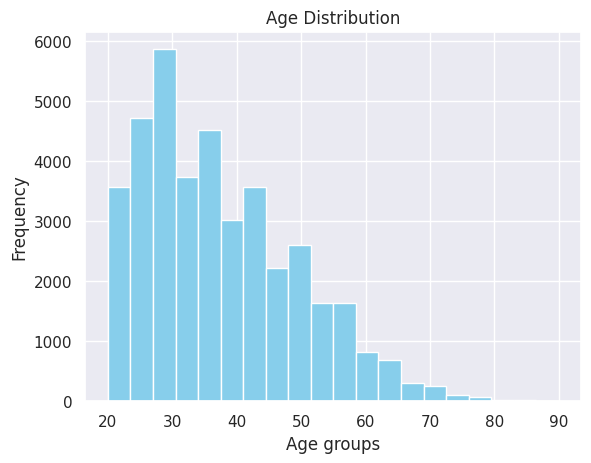

In [36]:
# Define bin edges for each group of 3 years
plt.hist(final_df['Age'], bins=20, color='skyblue')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
